In [1]:
import pandas as pd
import numpy as np

In [2]:
    input_folder_path= r"/Users/soumyamohapatra/CMPE-256/Data"

    filename = "/WalmartDatasset.txt"
    
    header_names=["term","product_id", "language","product_impressions","Product_clicks","cart_adds","cart_start","checkout","order"]
    df_dly_hdp = pd.read_csv(input_folder_path+filename, sep='\t', names = header_names)

In [3]:
    # filter out French language records
    df_dly_hdp = (df_dly_hdp[df_dly_hdp['language'] == 'English'])

    joined_df_dly = (
    df_dly_hdp[['term', 'product_id', 'product_impressions', 'Product_clicks', 'cart_adds', 'checkout', 'order']])

In [4]:
# print(df_dly_hdp)


joined_df_dly['searchTerm'] = joined_df_dly['term']
joined_df_dly['ATR'] = joined_df_dly['cart_adds'] / joined_df_dly['product_impressions']
joined_df_dly['CTR'] = joined_df_dly['Product_clicks'] / joined_df_dly['product_impressions']
joined_df_dly['conv'] = joined_df_dly['order'] / joined_df_dly['product_impressions']

columns_all = ['searchTerm', 'product_id', 'product_impressions', 'Product_clicks', 'cart_adds', 'order', 'CTR', 'ATR',
               'conv']


/anaconda2/envs/condavirt/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [13]:
# columns for input

joined_df_dly = joined_df_dly[list(columns_all)].reset_index()

print(joined_df_dly.info())

###########################################3

# print(joined_df_dly.tail(50))

# Concat null results and positive results - Final step

# columns for input

final_merged_dataset = joined_df_dly[list(columns_all)]
final_merged_dataset = final_merged_dataset.replace(np.nan, 0)
final_merged_dataset = final_merged_dataset.drop_duplicates()

final_merged_dataset.to_csv(r"/Users/soumyamohapatra/CMPE-256/Data/final_merged_dataset_mthly2_test.csv", sep=',',
                            index=False)

# result = df_dly_null.append(df_dly_pos, ignore_index=True)
print(final_merged_dataset.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330548 entries, 0 to 1330547
Data columns (total 10 columns):
index                  1330548 non-null int64
searchTerm             1329176 non-null object
product_id             1330548 non-null int64
product_impressions    1330548 non-null int64
Product_clicks         1330548 non-null int64
cart_adds              1330548 non-null int64
order                  1330548 non-null int64
CTR                    1330548 non-null float64
ATR                    1330548 non-null float64
conv                   1330548 non-null float64
dtypes: float64(3), int64(6), object(1)
memory usage: 101.5+ MB
None
                                         searchTerm     product_id  \
0                                childrens lap desk  6000065495247   
1                          rice cooker with steamer  6000196308548   
2  Depend Silhouette For Women Briefs, Small/Medium  6000188021783   
3                                power it generator  6000196423433   
4

In [14]:
#pd.read_csv('final_merged_dataset_mthly2.csv')
df2 = pd.read_csv('/Users/soumyamohapatra/CMPE-256/Data/final_merged_dataset_mthly2_test.csv', encoding='latin-1')

In [167]:
df3 = df2[((df2['ATR'] >0)&(df2['CTR'] >0)&(df2['conv'] >0))]

In [168]:
row_counts = {}
for i in df3['searchTerm']:
    if i in row_counts:
        row_counts[i]+=1
    else:
        row_counts[i]=1

In [169]:
len(row_counts)

30638

In [170]:
highfreq_searchStrings = []
for j in row_counts:
    if row_counts[j] > 50:
        highfreq_searchStrings.append(j)

In [171]:
len(highfreq_searchStrings)
#print(highfreq_searchStrings[0])

18

In [172]:
row_counts['great value']

51

In [173]:
row_counts['0']

8

In [174]:
row_counts['school supplies']

50

In [175]:
row_counts['storage']

24

In [176]:
dfsearch = df3[(df3['searchTerm'] == highfreq_searchStrings[0])]

In [177]:
print (dfsearch)

        searchTerm     product_id  product_impressions  Product_clicks  \
448      baby food  6000195285346                 2083              38   
14552    baby food  6000001830615                 1877              57   
20391    baby food  6000106851325                 4522              61   
21976    baby food  6000188129421                 4721             106   
23385    baby food  6000195091573                  127               6   
24745    baby food  6000032324671                 2963              38   
37022    baby food  6000032324715                 4514              49   
39205    baby food  6000192504366                 5186             172   
46782    baby food  6000193235154                 4606              59   
64484    baby food  6000195518209                 4120              61   
76283    baby food  6000193235147                 5052              85   
122016   baby food  6000021686348                   46               4   
140626   baby food  6000188129427     

In [178]:
ATRstd,CTRstd = dfsearch[['ATR','CTR']].std()
ATRmean,CTRmean = dfsearch[['ATR','CTR']].mean()

In [179]:
print(ATRstd)
print(CTRstd)
print(ATRmean)
print(CTRmean)

0.0513602472235
0.0357604794246
0.043828787319
0.0400079130584


In [180]:
##data cleaning as few outliers were present and it was difficult to visualize data relationship , very fat tail
##lot of value in the lower end 
dfsearchWoOutliers = dfsearch[((dfsearch['ATR']<=(ATRmean+2*ATRstd))& (dfsearch['ATR']>=(ATRmean-1*ATRstd)))]
dfsearchWoOutliers = dfsearchWoOutliers[((dfsearch['CTR']<=(CTRmean+2*CTRstd))& (dfsearch['CTR']>=(CTRmean-1*CTRstd)))]

/anaconda2/envs/condavirt/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


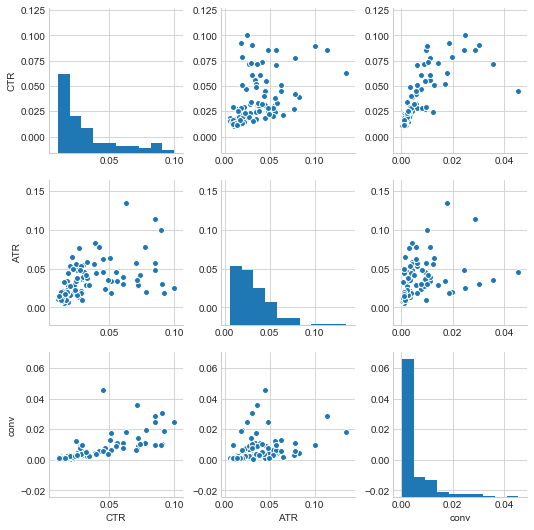

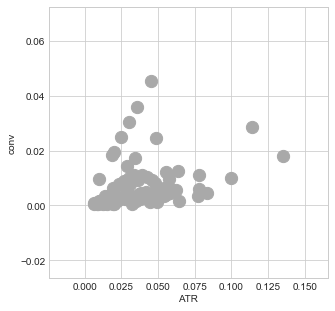

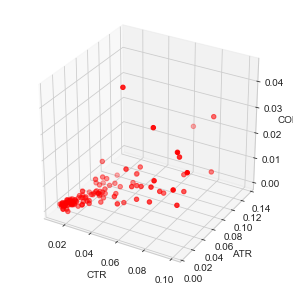

In [181]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from pandas.tools.plotting import scatter_matrix
from pylab import rcParams
import seaborn as sb
rcParams['figure.figsize'] = 5,5
sb.set_style('whitegrid')
#plt.hist(dfsearch['CTR'])
#plt.plot()
sb.pairplot(dfsearchWoOutliers,vars=['CTR','ATR','conv'], y_vars=['conv'])
dfsearchWoOutliers.plot(kind='scatter',x='ATR',y='conv',c=['darkgray'],s=150)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(dfsearchWoOutliers['CTR'], dfsearchWoOutliers['ATR'], dfsearchWoOutliers['conv'], c='r', marker='o')
ax.set_xlabel('CTR')
ax.set_ylabel('ATR')
ax.set_zlabel('CONV')
plt.show()
